created on 12/9/15 (revisit chris mccormick's SVM discussion; 1 month before samsung; just met jason zhangs new kid; moved into 2 grace court last week; good review of theano too; had lunch with jordan and nk earlier today)

once SVM finds support vectors, it generates a decision function. the decision function is applied to test data, where it returns either -1 or 1. (this is why SVM works well in 1-vs-all approaches.)

reference: https://chrisjmccormick.wordpress.com/2013/04/16/trivial-svm-example/

In [134]:
import pandas as pd
import numpy as np

# step 1: data

replicate data from mccormick's example.

In [135]:
data = pd.read_table("data.txt", header = None)
data.columns = [['x1', 'x2', 'y']]
data.head()

,x1,x2,y
0,4,7,0
1,7,2,0
2,0,12,0
3,1,8,0
4,3,4,0


# step 2: construct decision function

three support vectors have been identified. they are [9,5 for class 0], [4,7 for class 1], and [7,2 for class 1]. a decision function is constructed from support vectors - every other training data point is effectively ignored.

In [136]:
import theano.tensor as T
from theano import function

In [137]:
x = T.dvector('x') # input vectors are 2D

# it is dot product, not element wise multiplication
y = (0.0005 * T.dot(np.array([7,2]), x) ** 2) + (-.0006 * T.dot(np.array([9,5]), x) ** 2) + (0.0001 * T.dot(np.array([4,7]), x) ** 2) + 2.7035

In [138]:
# compile function

decision_func = function([x], y)

# evaluate

#### task A) grid search 

lets grid search across possible points in order to map out the decision boundary.

In [146]:
x1_pts = []
x2_pts = []
z_pts = []

for i in range(16):
    
    for j in range(16):
        
        x1_pts.append(i)
        x2_pts.append(j)
        
        # only care about negative or positive - actual value does not matter
        z = svm_decision_function([i, j]) > 0
        
        z_pts.append(z)

In [147]:
grid_data = pd.DataFrame(zip(x1_pts, x2_pts, z_pts))
grid_data.head()

,0,1,2
0,0,0,True
1,0,1,True
2,0,2,True
3,0,3,True
4,0,4,True


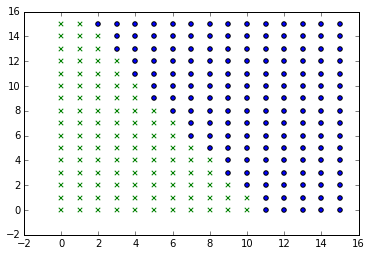

In [149]:
import matplotlib.pyplot as plt

%matplotlib inline

# subset df by class for prettier plotting

class_1 = grid_data[grid_data[2] == True]
class_2 = grid_data[grid_data[2] == False]

plt.scatter(class_1[0], class_1[1], c = 'g', marker = 'x')
plt.scatter(class_2[0], class_2[1], c = 'b', marker = 'o')

#### task b) actual data points

lets see how the decision function classifies actual points. you can compare results with tthe actual labels here: https://chrisjmccormick.wordpress.com/2013/04/16/trivial-svm-example/

In [150]:
x1_pts = []
x2_pts = []
z_pts = []

for idx in range(data.shape[0]):
    i = data['x1'][idx]
    j = data['x2'][idx]
    
    # remember, we dont care about actual values - just the signs
    z = decision_func([i, j]) > 0
    
    x1_pts.append(i)
    x2_pts.append(j)
    z_pts.append(z)

In [151]:
grid_data = pd.DataFrame(zip(x1_pts, x2_pts, z_pts))
grid_data.head()

,0,1,2
0,4,7,True
1,7,2,True
2,0,12,True
3,1,8,True
4,3,4,True


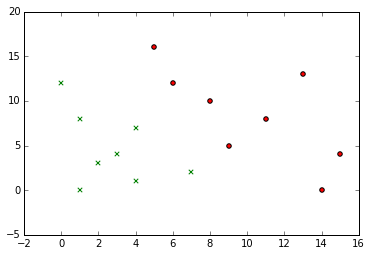

In [152]:
# subset data for pretty plotting

class_1 = grid_data[grid_data[2] == True]
class_2 = grid_data[grid_data[2] == False]

plt.scatter(class_1[0], class_1[1], c = 'g', marker = 'x')
plt.scatter(class_2[0], class_2[1], c = 'r', marker = 'o')